In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

centers = [[2, 4], [6, 6], [1, 9]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=150, 
                          centers=np.array(centers),
                          random_state=1)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 80-20 split of the data
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=1)

# perform a KNN analysis with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_data, train_labels)
pred_labels = knn.predict(test_data)

# output accuracy score
accuracy = accuracy_score(test_labels, pred_labels)
print("Accuracy:", accuracy)

Accuracy: 1.0


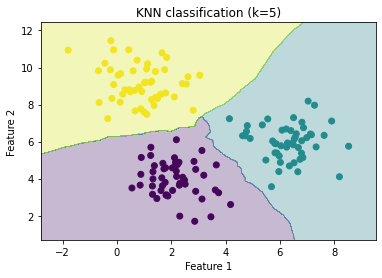

In [3]:
# plot the simulated data with different colors for each class
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')

# plot the decision boundary of the KNN classifier
h = 0.02  # step size in the mesh
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)

# add plot title and axis labels
plt.title("KNN classification (k=5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# show the plot
plt.show()